In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('SeattleCrime_1996-2007.csv')
df.head(20)

,Report_Year,Census_Tract_1990,Crime_Type,Report_Year_Total
0,1996,1.0,Aggravated Assault,11
1,1996,1.0,Homicide,0
2,1996,1.0,NonResidential Burglary,41
3,1996,1.0,Property Crimes Total,430
4,1996,1.0,Rape,2
5,1996,1.0,Residential Burglary,42
6,1996,1.0,Robbery,2
7,1996,1.0,Theft,293
8,1996,1.0,Vehicle Theft,53
9,1996,1.0,Violent Crimes Total,15


In [3]:
df.shape

(14268, 4)

In [4]:
df.isnull().sum()

Report_Year           0
Census_Tract_1990    32
Crime_Type            0
Report_Year_Total     0
dtype: int64

In [5]:
df.dtypes

Report_Year            int64
Census_Tract_1990    float64
Crime_Type            object
Report_Year_Total      int64
dtype: object

In [22]:
crime_type = df.groupby(df.Crime_Type).Report_Year.value_counts()
crime_type

Crime_Type            Report_Year
Aggravated Assault    1996           123
                      1997           123
                      1998           123
                      1999           123
                      2000           123
                                    ... 
Violent Crimes Total  2001           123
                      2002           123
                      2003           123
                      2004           123
                      2005           123
Name: Report_Year, Length: 116, dtype: int64

In [8]:
crime_type = df['Crime_Type'].value_counts()
crime_type.sort_values(ascending=False, inplace=True)

plt.subplots(figsize=(200,100))
sns.barplot(x=crime_type.values, y=crime_type.index, order=crime_type.index, orient='h')

In [10]:
df.groupby(['Crime_Type', 'Census_Tract_1990']).Report_Year_Total.sum()

Crime_Type            Census_Tract_1990
Aggravated Assault    1.0                   21.416667
                      2.0                    8.416667
                      3.0                    5.833333
                      4.0                   24.583333
                      5.0                    1.833333
                                              ...    
Violent Crimes Total  117.0                 25.300000
                      118.0                130.800000
                      119.0                 36.100000
                      120.0                  6.400000
                      121.0                  2.800000
Name: Report_Year_Total, Length: 1246, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1268f2590>,
      dtype=object)

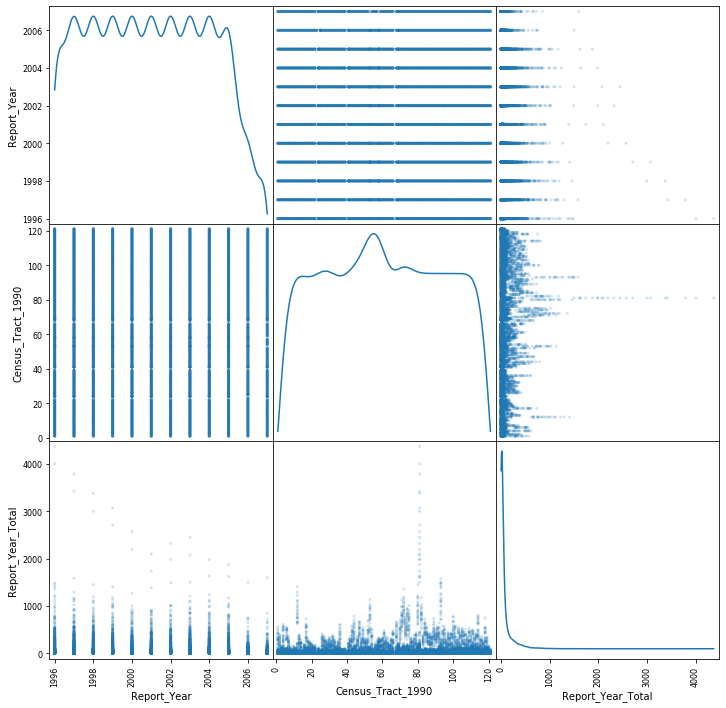

In [17]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(12, 12), diagonal='kde')

In [35]:
df.groupby(df.Crime_Type).Census_Tract_1990.value_counts()

Crime_Type            Census_Tract_1990
Aggravated Assault    1.0                  12
                      2.0                  12
                      3.0                  12
                      4.0                  12
                      5.0                  12
                                           ..
Violent Crimes Total  117.0                10
                      118.0                10
                      119.0                10
                      120.0                10
                      121.0                10
Name: Census_Tract_1990, Length: 1246, dtype: int64

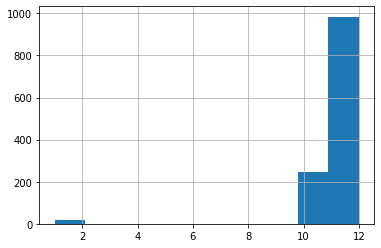

In [36]:
df.groupby(df.Crime_Type).Census_Tract_1990.value_counts().hist()

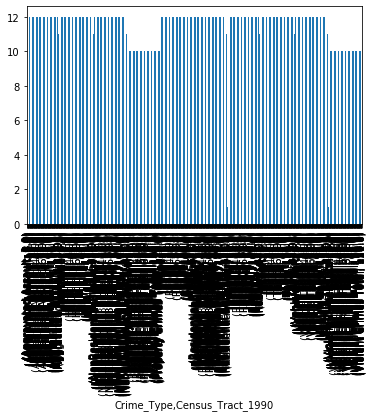

In [39]:
df.groupby(df.Crime_Type).Census_Tract_1990.value_counts().plot(kind='bar', stacked=True)